<a href="https://colab.research.google.com/github/Capacitator/Person-detection/blob/main/person_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi

Sun May 26 08:33:41 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   48C    P0              29W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [3]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 779.6/779.6 kB 7.9 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

In [ ]:
from google.colab import drive


drive.mount('/content/drive')
!yolo task=detect mode=predict model = /content/drive/MyDrive/Syook files/runs/detect/train13/weights/best.pt conf=0.5 source = "https://thumbs.dreamstime.com/z/happy-smiling-construction-workers-looking-camera-72768205.jpg"

Mounted at /content/drive
Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/cfg/__init__.py", line 513, in entrypoint
    check_dict_alignment(full_args_dict, {a: ""})
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/cfg/__init__.py", line 323, in check_dict_alignment
    raise SyntaxError(string + CLI_HELP_MSG) from e
SyntaxError: 'files/runs/detect/train13/weights/best.pt' is not a valid YOLO argument. 

    Arguments received: ['yolo', 'task=detect', 'mode=predict', 'model', '=', '/content/drive/MyDrive/Syook', 'files/runs/detect/train13/weights/best.pt', 'conf=0.5', 'source', '=', 'https://thumbs.dreamstime.com/z/happy-smiling-construction-workers-looking-camera-72768205.jpg']. Ultralytics 'yolo' commands use the following syntax:

        yolo TASK MODE ARGS

        Where   TASK (optional) is one of {'pose', 'segment', 'detect', 'obb', 'classify'}
 

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

#YOLOv8 library
!pip install ultralytics

# Import necessary libraries
import os
from ultralytics import YOLO

# Define paths
train_images_dir = '/content/drive/MyDrive/Syook files/images'
val_images_dir = '/content/drive/MyDrive/Syook files/images_val'
annotations_dir = '/content/drive/MyDrive/Syook files/annotations'
filtered_annotations_dir = '/content/drive/MyDrive/Syook files/filtered_annotations'

# Ensure output directories exist
os.makedirs(filtered_annotations_dir, exist_ok=True)

# Filter annotations to include only the 'person' class (class ID 0)
def filter_person_class(input_dir, output_dir, person_class_id=0):
    for filename in os.listdir(input_dir):
        if filename.endswith('.txt'):
            input_file = os.path.join(input_dir, filename)
            output_file = os.path.join(output_dir, filename)

            with open(input_file, 'r') as infile, open(output_file, 'w') as outfile:
                for line in infile:
                    class_id = int(line.split()[0])
                    if class_id == person_class_id:
                        outfile.write(line)

filter_person_class(annotations_dir, filtered_annotations_dir)

# Update the dataset YAML configuration
yaml_content = """
# Train/val paths
train: /content/drive/MyDrive/Syook files/images
val: /content/drive/MyDrive/Syook files/images_val

# Classes
nc: 1
names: ['person']
"""

yaml_path = '/content/drive/MyDrive/Syook files/custom2.yaml'
with open(yaml_path, 'w') as file:
    file.write(yaml_content)

# Train YOLOv8 with the filtered dataset
model = YOLO('yolov8n.yaml')

# Train the model
model.train(data=yaml_path, epochs=20, imgsz=640)


Mounted at /content/drive
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 778.4/778.4 kB 6.5 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvt

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Syook files/annotations'

In [ ]:

from ultralytics import YOLO
from google.colab import drive


drive.mount('/content/drive')

#YAML file
yaml_path = '/content/drive/MyDrive/Syook files/custom2.yaml'

# Load the YOLOv8 model
model = YOLO('yolov8n.pt')

# Train the model
model.train(data=yaml_path, epochs=20)


model.curves(save_dir='/content/drive/MyDrive/Syook files')

print(model.curves_results)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Ultralytics YOLOv8.2.22 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/Syook files/custom2.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train13, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, 

train: Scanning /content/drive/.shortcut-targets-by-id/1sCwCEQ4dpg2Pkl_1JlvNlXAIW43OI-W6/Syook files/labels.cache... 0 images, 404 backgrounds, 0 corrupt: 100%|██████████| 404/404 [00:00<?, ?it/s]

WARNING ⚠️ No labels found in /content/drive/.shortcut-targets-by-id/1sCwCEQ4dpg2Pkl_1JlvNlXAIW43OI-W6/Syook files/labels.cache, training may not work correctly. See https://docs.ultralytics.com/datasets/detect for dataset formatting guidance.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/drive/.shortcut-targets-by-id/1sCwCEQ4dpg2Pkl_1JlvNlXAIW43OI-W6/Syook files/labels.cache... 0 images, 404 backgrounds, 0 corrupt: 100%|██████████| 404/404 [00:00<?, ?it/s]

WARNING ⚠️ No labels found in /content/drive/.shortcut-targets-by-id/1sCwCEQ4dpg2Pkl_1JlvNlXAIW43OI-W6/Syook files/labels.cache, training may not work correctly. See https://docs.ultralytics.com/datasets/detect for dataset formatting guidance.


Plotting labels to runs/detect/train13/labels.jpg... 
zero-size array to reduction operation maximum which has no identity
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train13
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      3.03G          0      109.3          0          0        640: 100%|██████████| 26/26 [00:12<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.26it/s]

                   all        404          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      2.85G          0      79.08          0          0        640: 100%|██████████| 26/26 [00:08<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:06<00:00,  1.90it/s]

                   all        404          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      2.84G          0      70.11          0          0        640: 100%|██████████| 26/26 [00:08<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:06<00:00,  1.93it/s]

                   all        404          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      2.84G          0      57.74          0          0        640: 100%|██████████| 26/26 [00:07<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  3.18it/s]

                   all        404          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      2.84G          0       48.5          0          0        640: 100%|██████████| 26/26 [00:11<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.43it/s]

                   all        404          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      2.84G          0      40.93          0          0        640: 100%|██████████| 26/26 [00:10<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.36it/s]

                   all        404          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      2.84G          0      34.66          0          0        640: 100%|██████████| 26/26 [00:07<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:06<00:00,  2.09it/s]

                   all        404          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      2.84G          0      28.83          0          0        640: 100%|██████████| 26/26 [00:09<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.47it/s]

                   all        404          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      2.83G          0       23.9          0          0        640: 100%|██████████| 26/26 [00:12<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.35it/s]

                   all        404          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      2.84G          0      20.12          0          0        640: 100%|██████████| 26/26 [00:08<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:06<00:00,  1.95it/s]

                   all        404          0          0          0          0          0


WARNING ⚠️ no labels found in detect set, can not compute metrics without labels
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      2.83G          0       17.1          0          0        640: 100%|██████████| 26/26 [00:08<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:06<00:00,  2.03it/s]

                   all        404          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      2.83G          0      14.62          0          0        640: 100%|██████████| 26/26 [00:08<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.60it/s]

                   all        404          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      2.83G          0       12.6          0          0        640: 100%|██████████| 26/26 [00:11<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.75it/s]

                   all        404          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      2.83G          0      11.07          0          0        640: 100%|██████████| 26/26 [00:07<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:06<00:00,  1.97it/s]

                   all        404          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      2.84G          0      9.836          0          0        640: 100%|██████████| 26/26 [00:07<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.52it/s]

                   all        404          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      2.84G          0      8.889          0          0        640: 100%|██████████| 26/26 [00:10<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.41it/s]

                   all        404          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      2.83G          0      8.118          0          0        640: 100%|██████████| 26/26 [00:09<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:06<00:00,  1.91it/s]

                   all        404          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      2.83G          0      7.571          0          0        640: 100%|██████████| 26/26 [00:06<00:00,  3.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.93it/s]

                   all        404          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      2.83G          0      7.209          0          0        640: 100%|██████████| 26/26 [00:09<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.30it/s]

                   all        404          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      2.83G          0      6.979          0          0        640: 100%|██████████| 26/26 [00:11<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.67it/s]

                   all        404          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels



20 epochs completed in 0.095 hours.
Optimizer stripped from runs/detect/train13/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train13/weights/best.pt, 6.2MB

Validating runs/detect/train13/weights/best.pt...
Ultralytics YOLOv8.2.22 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.42it/s]

                   all        404          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels


Speed: 0.2ms preprocess, 2.9ms inference, 0.0ms loss, 5.8ms postprocess per image
Results saved to runs/detect/train13


AttributeError: 'YOLO' object has no attribute 'curves'

In [7]:
!yolo task=detect mode=predict model="/content/drive/MyDrive/Syook files/best.pt" conf=0.25 source="https://img.freepik.com/free-photo/three-men-looking-aside-construction-site_259150-57679.jpg" save = True

Ultralytics YOLOv8.2.28 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

Found https://img.freepik.com/free-photo/three-men-looking-aside-construction-site_259150-57679.jpg locally at three-men-looking-aside-construction-site_259150-57679.jpg
image 1/1 /content/three-men-looking-aside-construction-site_259150-57679.jpg: 448x640 3 persons, 98.4ms
Speed: 5.1ms preprocess, 98.4ms inference, 521.6ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs/detect/predict2
💡 Learn more at https://docs.ultralytics.com/modes/predict


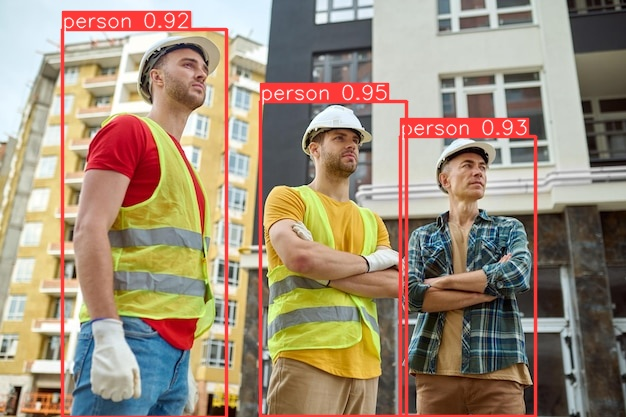

In [12]:
from IPython.display import Image

# Display the predicted image
source = '/content/runs/detect/predict2/three-men-looking-aside-construction-site_259150-57679.jpg'
Image(filename=source)

